## Plots for the H2AMI 

In [24]:
import bagpy
import pandas as pd
import numpy as np
from bagpy import bagreader

# Figure manipulation methods
def create_figure(col, row, figsize_=(10, 8)):
    fig, axes = plt.subplots(col, row, figsize=figsize_)
    return fig, axes

def load_bag_file(file_path):
    try:
        # Load the bag file
        bag = bagreader(file_path)
        print(f"Bag loaded successfully: {file_path}")
        return bag
    except Exception as e:
        print(f"Failed to load bag file: {e}")
        return None

def get_pandas_by_topic(file_path, topic_list): 
    bag = load_bag_file(file_path)
    pds = {} 
    for topic in topic_list: 
        pds["{}".format(topic)] = pd.read_csv(bag.message_by_topic(topic))
    return pds



[INFO]  Successfully created the data folder ./bags/h2ami_bags/first_meas_op.
Bag loaded successfully: ./bags/h2ami_bags/first_meas_op.bag


In [3]:
bag_pth = './bags/h2ami_bags/uam_exp_first.bag'
b_ = load_bag_file(bag_pth)
pd_ = get_pandas_by_topic(bag_pth, [t for t in b_.topic_table['Topics']])

[INFO]  Successfully created the data folder ./bags/h2ami_bags/uam_exp_first.
Bag loaded successfully: ./bags/h2ami_bags/uam_exp_first.bag
[INFO]  Data folder ./bags/h2ami_bags/uam_exp_first already exists. Not creating.
Bag loaded successfully: ./bags/h2ami_bags/uam_exp_first.bag


In [7]:
print(b_.topic_table)

                                Topics  \
0  /control_arm/arm/state/current_pose   
1        /control_arm/delta_twist_cmds   
2                /hpe3d/openpose_hpe3d   
3      /red/mavros/local_position/pose   
4                            /red/pose   
5        /red/position_hold/trajectory   
6                        /uav/pose_ref   
7                        /uav/test_ref   

                                          Types  Message Count  Frequency  
0                            geometry_msgs/Pose          84365        NaN  
1                    geometry_msgs/TwistStamped           1014   9.708738  
2                      hpe_ros_msgs/HumanPose3D           2986  25.000000  
3                     geometry_msgs/PoseStamped           5932  50.000000  
4                     geometry_msgs/PoseStamped           5935  50.000000  
5  trajectory_msgs/MultiDOFJointTrajectoryPoint           1014   9.708738  
6                     geometry_msgs/PoseStamped           1014   9.708738  
7            

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


In [108]:
# ARM CMD
arm_cmd = pd_['/control_arm/delta_twist_cmds']
t_arm = arm_cmd['Time'] - arm_cmd['Time'][0]
arm_ee_v = np.array([b_cmd['twist.linear.x'],
                     b_cmd['twist.linear.y'],
                     b_cmd['twist.linear.z']])

# UAV CMD
uav_cmd_ = pd_['/uav/pose_ref']
t_uav = uav_cmd_['Time'] - uav_cmd_['Time'][0]
uav_cmd = np.array([uav_cmd_['pose.position.x'],
                    uav_cmd_['pose.position.y'],
                    uav_cmd_['pose.position.z']])


In [112]:
# CURRENT ARM STATE
arm_state = pd_['/control_arm/arm/state/current_pose']
t_arm_state = arm_state['Time'] - arm_state['Time'][0]
arm_pose_curr = np.array([arm_state['position.x'],
                          arm_state['position.y'],
                          arm_state['position.z']])

# CURRENT UAV POSE
uav_state = pd_['/red/mavros/local_position/pose']
t_uav_state = uav_state['Time'] - uav_state['Time'][0]
uav_pose_curr = np.array([uav_state['pose.position.x'],
                          uav_state['pose.position.y'],
                          uav_state['pose.position.z']])

print(uav_cmd_['Time'])
print(uav_state['Time'])

0       297.733
1       297.837
2       297.941
3       298.041
4       298.141
         ...   
1009    401.781
1010    401.885
1011    401.988
1012    402.090
1013    402.190
Name: Time, Length: 1014, dtype: float64
0       284.406
1       284.427
2       284.446
3       284.465
4       284.485
         ...   
5927    403.015
5928    403.035
5929    403.055
5930    403.075
5931    403.095
Name: Time, Length: 5932, dtype: float64


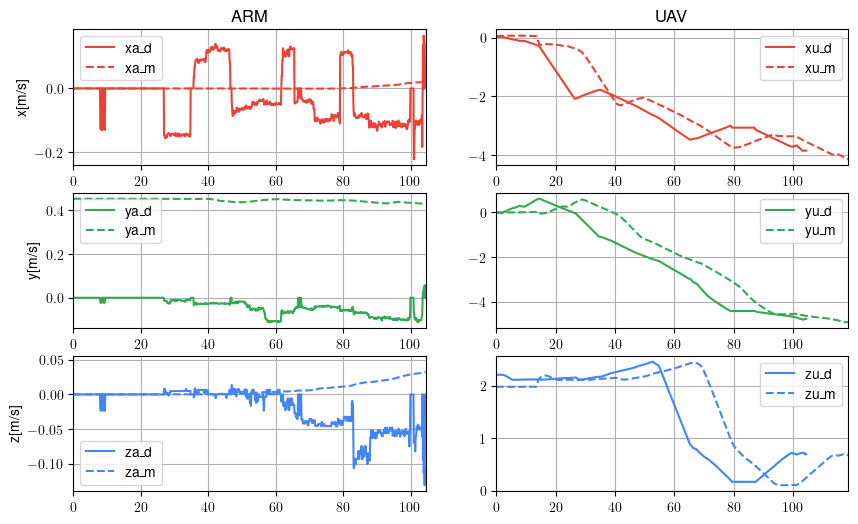

In [113]:
fig_, axs = create_figure(3, 2, figsize_=(10,6))

g_red, g_green, g_blue = '#EA4335', '#34A853', '#4285F4'

# Plot arm 
_0 = axs[0, 0]
_0.plot(t_arm, arm_ee_v[0], color=g_red, label='xa_d')
_0.plot(t_arm_state, arm_pose_curr[0], color=g_red, linestyle='--', label='xa_m')
_0.set_xlim(min(t_arm), max(t_arm))
_0.set_ylabel('x[m/s]')
_0.set_title('ARM')
_0.legend(loc='best')
_0.grid()

_1 = axs[1, 0]
_1.plot(t_arm, arm_ee_v[1], color=g_green, label='ya_d')
_1.plot(t_arm_state, arm_pose_curr[1], color=g_green, linestyle='--', label='ya_m')
_1.set_xlim(min(t_arm), max(t_arm))
_1.set_ylabel('y[m/s]')
_1.legend(loc='best')
_1.grid()

_2 = axs[2, 0]
_2.plot(t_arm, arm_ee_v[2], color=g_blue, label='za_d')
_2.plot(t_arm_state, arm_pose_curr[2], color=g_blue, linestyle='--', label='za_m')
_2.set_xlim(min(t_arm), max(t_arm))
_2.set_ylabel('z[m/s]')
_2.legend(loc='best')
_2.grid()

# Plot UAV 
_3 = axs[0, 1]
_3.plot(t_uav, uav_cmd[0], color=g_red, label='xu_d')
_3.plot(t_uav_state, uav_pose_curr[0], color=g_red, linestyle='--', label='xu_m')
_3.set_xlim(min(t_uav_state), max(t_uav_state))
_3.set_title('UAV')
_3.grid()
_3.legend(loc='best')

_4 = axs[1, 1]
_4.plot(t_uav, uav_cmd[1], color=g_green, label='yu_d')
_4.plot(t_uav_state, uav_pose_curr[1], color=g_green, linestyle='--', label='yu_m')
_4.set_xlim(min(t_uav_state), max(t_uav_state))
_4.grid()
_4.legend(loc='best')

_5 = axs[2, 1]
_5.plot(t_uav, uav_cmd[2], color=g_blue, label='zu_d')
_5.plot(t_uav_state, uav_pose_curr[2], color=g_blue, linestyle='--', label='zu_m')
_5.set_xlim(min(t_uav_state), max(t_uav_state))
_5.grid()
_5.legend(loc='best')